In [310]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [311]:
# read data
X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv')

### Thực hiện trên tệp dữ liệu đã chuẩn hóa

In [312]:
kmeans = KMeans(n_clusters=7, random_state=0) # 7 clusters for 7 classes
kmeans.fit(X)

C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [313]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=16)
X_t = pca.fit_transform(StandardScaler().fit_transform(X))

In [314]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_t)

C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

In [315]:
# accuracy
y_pred = kmeans.predict(X_t)
centers = kmeans.cluster_centers_
print(centers)
print('Accuracy: ', accuracy_score(y, y_pred))

[[ 0.46777566 -0.85534943 -2.11325386 -1.59817641 -0.06088055  0.03056705
  -0.06131271 -0.25641676 -0.14648765 -0.21289301 -0.04328133 -0.29210165
   0.15045975  0.32683039  0.36598678  0.44267611]
 [-1.14105877  1.07556078 -0.10296277  0.51972468 -0.3509578  -0.75342563
  -1.19268382  0.54421817  0.39062468  0.31912692 -0.12233989 -0.40341676
   0.02888351  0.12834914  0.3852677   0.24268813]
 [-0.40316794 -1.66254188 -0.35786772  1.37716596 -0.19752681 -0.26603857
   0.1513366  -0.2547515   0.12832147  0.17345603  0.17110416  0.06255364
   0.03127763 -0.05161273  0.03945008 -0.17509073]
 [ 1.55151694  0.01674821  0.76790849 -0.33658282 -0.34372686  0.19424386
  -0.40278955 -0.03194263  0.11981229  0.05643235  0.20264037 -0.08168504
  -0.04743486 -0.10060856 -0.34984909  0.12328086]
 [-3.08864361  0.48096525  1.04470482 -0.79907393 -0.07737055  0.80714026
   0.56048239 -0.68341218 -0.4450491  -0.19491584  0.21085712  0.28662331
  -0.01193005  0.1482959  -0.08818843  0.03762714]
 [ 1.

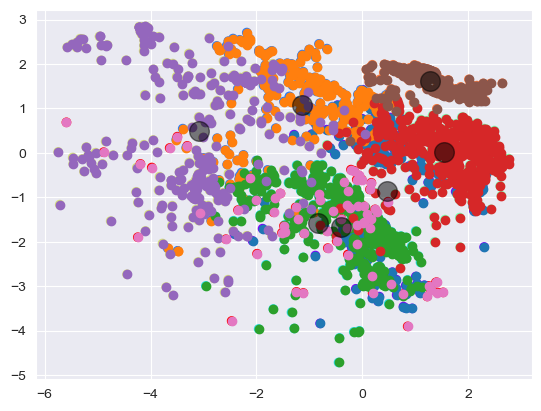

In [316]:
# display kmeans with labels and centers
plt.scatter(X_t[:, 0], X_t[:, 1], c=kmeans.labels_, cmap='rainbow')
centers = kmeans.cluster_centers_

# chú thích màu sắc cho từng cụm
for i in range(7):
    plt.scatter(X_t[y_pred == i, 0], X_t[y_pred == i, 1], label=f'Cluster {i}')

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


In [317]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
silouette = silhouette_score(X_t, kmeans.labels_)
print('silhouetter score:', silouette)

davies_bouldin = davies_bouldin_score(X_t, kmeans.labels_)
print('davies bouldin score:', davies_bouldin)

calinski_harabasz = calinski_harabasz_score(X_t, kmeans.labels_)
print('calinski harabasz score:', calinski_harabasz)

silhouetter score: 0.15873719458759183
davies bouldin score: 1.7801487034931682
calinski harabasz score: 194.7508399326358


In [318]:
import umap

um = umap.UMAP(n_components=16)
X_t = um.fit_transform(X)

In [319]:
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_t)

C:\Users\buian\.conda\envs\Py310-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=7, random_state=0)

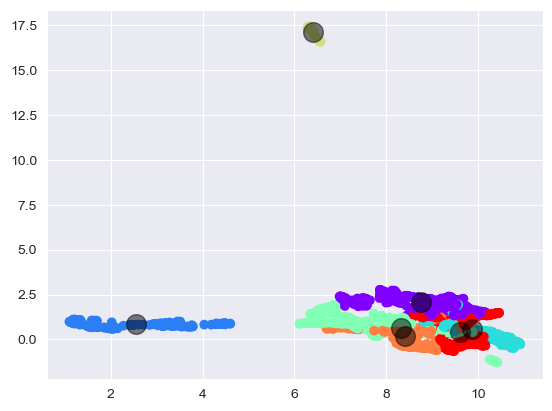

In [320]:
#plot umap
plt.scatter(X_t[:, 0], X_t[:, 1], c=kmeans.labels_, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


In [321]:
# accuracy
y_pred = kmeans.predict(X_t)
print('Accuracy: ', accuracy_score(y, y_pred))

Accuracy:  0.09474182851729038


In [322]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
silouette = silhouette_score(X_t, kmeans.labels_)
print('silhouetter score:', silouette)

davies_bouldin = davies_bouldin_score(X_t, kmeans.labels_)
print('davies bouldin score:', davies_bouldin)

calinski_harabasz = calinski_harabasz_score(X_t, kmeans.labels_)
print('calinski harabasz score:', calinski_harabasz)

silhouetter score: 0.3594171
davies bouldin score: 0.9691355036014394
calinski harabasz score: 1168.0449
